<a href="https://colab.research.google.com/github/GboyeStack-Robotics-ML-Engineer/Birth-Rate-Forcast-ARIMA-/blob/main/TIME_SERIES_FORECASTING_OF_BIRTH_RATE_IN_SHOMOLU_%2C_USING_ARIMA_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Prediction using the **ARIMA** prediction model

*Time series prediction using ARIMA model is a popular approach for forecasting future values of a time series. ARIMA models use past observations and trends to predict future values, and can be fine-tuned with parameters like p, d, and q to improve accuracy. They are useful in a variety of applications, such as finance, economics,birth-rate forcasting  and weather forecasting. ARIMA models can capture both short-term and long-term patterns in time series data, making them versatile and adaptable to changing conditions. Overall, ARIMA models are a powerful tool for time series prediction that can help provide valuable insights and inform decision-making.*

#Dynamics of the **ARIMA** prediction model

ARIMA stands for AutoRegressive Integrated Moving Average, which is a time series forecasting model used to predict future values based on past observations. ARIMA combines three components: **Autoregression (AR)**, **Integration (I)**, and **Moving Average (MA)**.

The **AR** component of the ARIMA model is the autoregressive component, which refers to a regression model that uses lagged values of the variable being forecasted to make predictions. ***The order of the AR component is denoted by the parameter "p"***. This parameter represents the number of lagged observations to include in the model. For example, an ARIMA model with p=1 uses the previous observation to forecast the next observation.

The **I** component of the ARIMA model is the differencing component. Differencing is the process of transforming a non-stationary time series into a stationary time series by taking the differences between consecutive observations. The** degree of differencing is denoted by the parameter "d"**. The differencing parameter indicates how many times the time series is differenced to make it stationary. For example, an ARIMA model with d=1 indicates that the first differences of the time series are used in the model.

The **MA** component of the ARIMA model is the moving average component. This component uses the errors from previous predictions to make future predictions. **The order of the MA component is denoted by the parameter "q"**. This parameter represents the number of lagged errors to include in the model. For example, an ARIMA model with q=1 uses the previous error to forecast the next observation.

*In summary, an ARIMA model is specified by three parameters: p, d, and q. These parameters represent the order of the autoregressive component, the degree of differencing, and the order of the moving average component, respectively. The values of these parameters are chosen based on the properties of the time series being modeled, such as the presence of seasonality or trends, the degree of correlation between observations, and the presence of outliers.*

#**THE BIRTH PREDICTION PROCESS USING THE ARIMA ALGORTIHM**

The  major steps involved in Birth rate prediction using the ARIMA model  are :

1.   Importing the required libraries
2.   Loading  and preprocessing the birth rate data.
3.   Stationarizing  the time series using differencing or other methods.
4.   Identify the ARIMA parameters using ACF and PACF plots.
5.   Train the ARIMA model, evaluate its performance, and generate predictions for future time periods.








#1).**IMPORTING THE REQUIRED LIBRARIES**



*For the purpose of simplicity , we would be employing the python programing langauge.This was chosen due to it Simplicity ,general purpose structure ,and availability of in-built packages for Data Visualization and Model training.*

*The Code Snipet below imports all the required libraries needed for this project.*

In [1]:
import pandas
import numpy as np
import matplotlib
import warnings


from pandas import read_csv,DataFrame
from pandas import datetime
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

<ipython-input-1-5aba64193bb6>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# 2).**LOADING AND PREPROCESSING BIRTH RATE DATA**

Load the dataset and preprocess it as needed, such as removing missing values or outliers, and converting data types as required.This helps to convert the dataset to a form that can be worked upon by the algorithm.
The libraries required for the cleaning include:

1.  pandas  :for converting the dataset to a Dataframe using the pandas.DataFrame() method.
2.  matplotlib : for DataVisualizations .This acheieved by calling the matplotlib.pyplot module

The following code snipet below loads,preprocesses and Visualizes the data.


Mounted at /content/drive


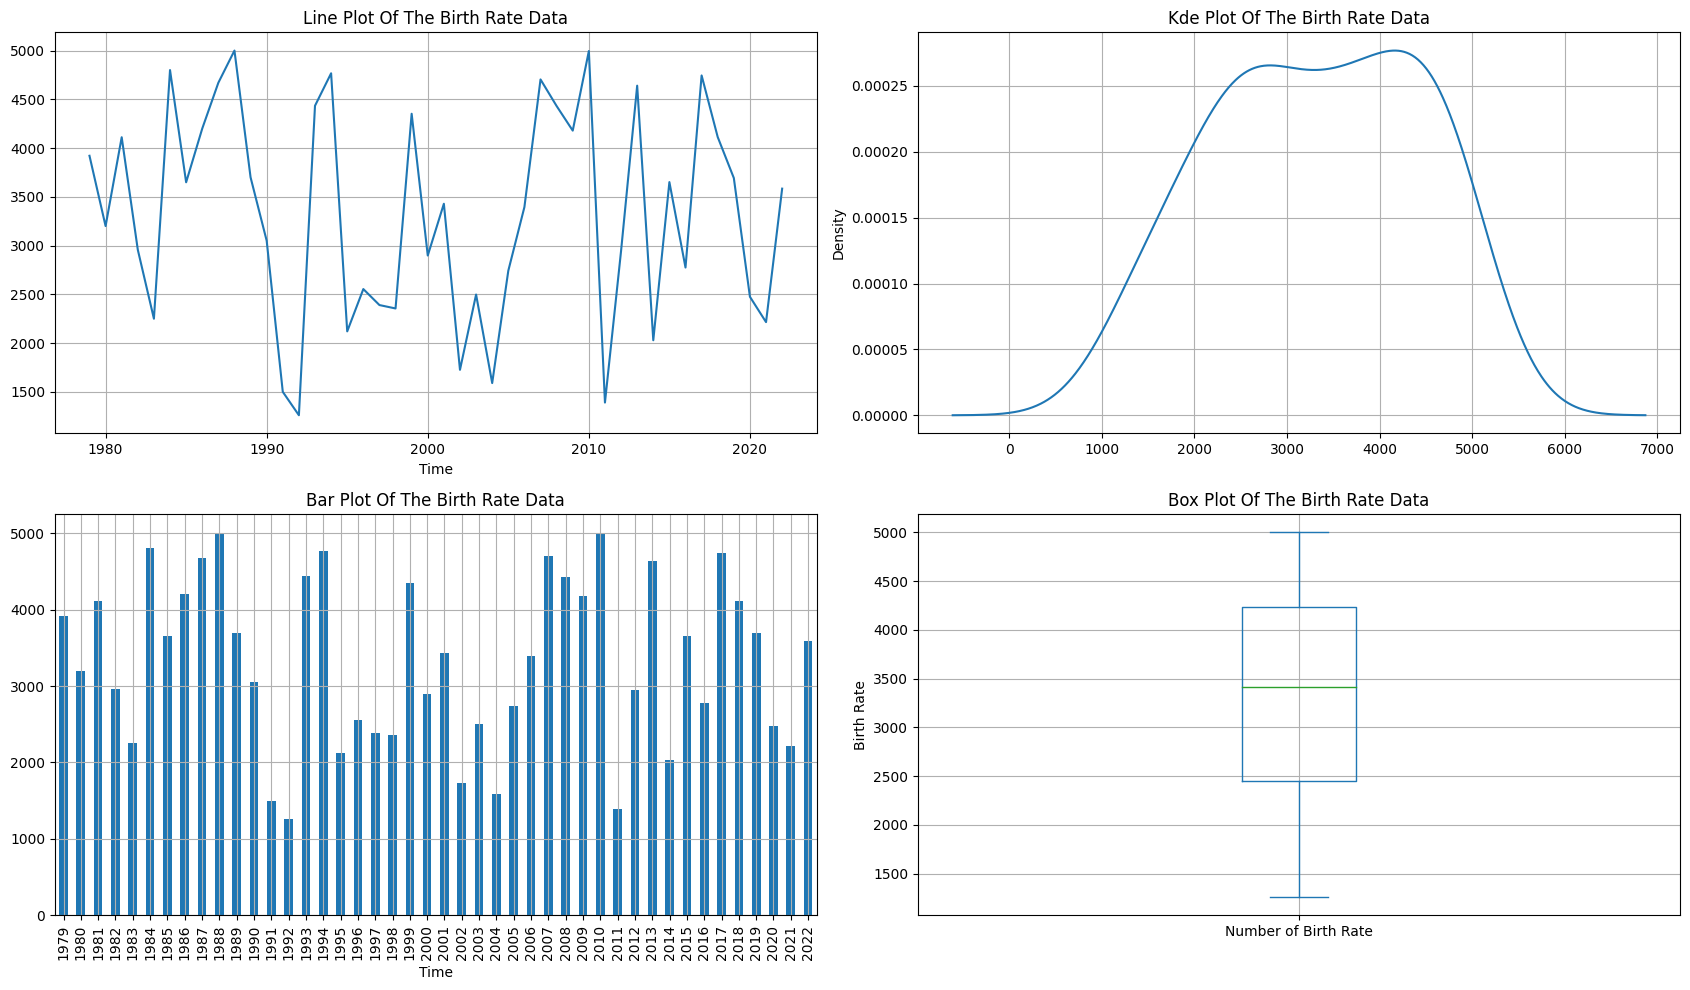

Index(['Number of Birth Rate'], dtype='object')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/drive')

data_path=r'/content/drive/MyDrive/BirthRateData(Revised).csv'

series=pd.read_csv(data_path)

series=series.reset_index(drop=True)

series.set_index('Time',inplace=True)

series=series[['Number of Birth Rate']]

plot_canvas=pyplot.figure(1,(17,10),layout='tight')

plot_types=['line','kde','bar','box']

for i in range(1,5):

  ax=plot_canvas.add_subplot(2,2,i)

  try:

    series['Number of Birth Rate'].plot(kind=plot_types[i-1],ax=ax)

    if i==3:

      ax.tick_params(labelbottom=True)

    ax.set_title('{} plot of the Birth rate data'.format(plot_types[i-1]).title())

  except:

    pass

  ax.grid(True)


pyplot.ylabel('Birth Rate')

pyplot.grid(True)

pyplot.show()

print(series.columns)

In [3]:
series

,Number of Birth Rate
Time,
1979,3921
1980,3200
1981,4111
1982,2957
1983,2250
1984,4800
1985,3649
1986,4200
1987,4670


In [4]:
series.describe()

,Number of Birth Rate
count,44.000000
mean,3320.045455
std,1098.718280
min,1260.000000
25%,2453.750000
50%,3412.000000
75%,4238.000000
max,5000.000000


In [5]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1979 to 2022
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Number of Birth Rate  44 non-null     int64
dtypes: int64(1)
memory usage: 704.0 bytes


In [6]:
import plotly.graph_objects as go

# Sample data


# Create a trace for the line plot
trace = go.Scatter(

    y=series['Number of Birth Rate'],
    mode='lines',
    name='Line Plot'
)

# Create a layout for the plot
layout = go.Layout(
    title='Line Plot',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Number of Birth Rate')
)

# Create the figure and add the trace and layout
figure = go.Figure(data=[trace], layout=layout)

# Display the plot
figure.show()

#3).**STATIONARIZING THE DATA(TIME SERIES DATA)**

Stationarizing a time series involves transforming it to a form where its statistical properties such as mean, variance, and autocorrelation remain constant over time.

Some methods of stationarizing a time series for birth rate prediction include differencing the series, applying a log transform, or taking a seasonal difference.

The goal of stationarizing the data is to make it more amenable to modeling using techniques like ARIMA.

Once stationarity is achieved, the time series can be modeled more accurately and effectively.

The code snippet below implements this process.

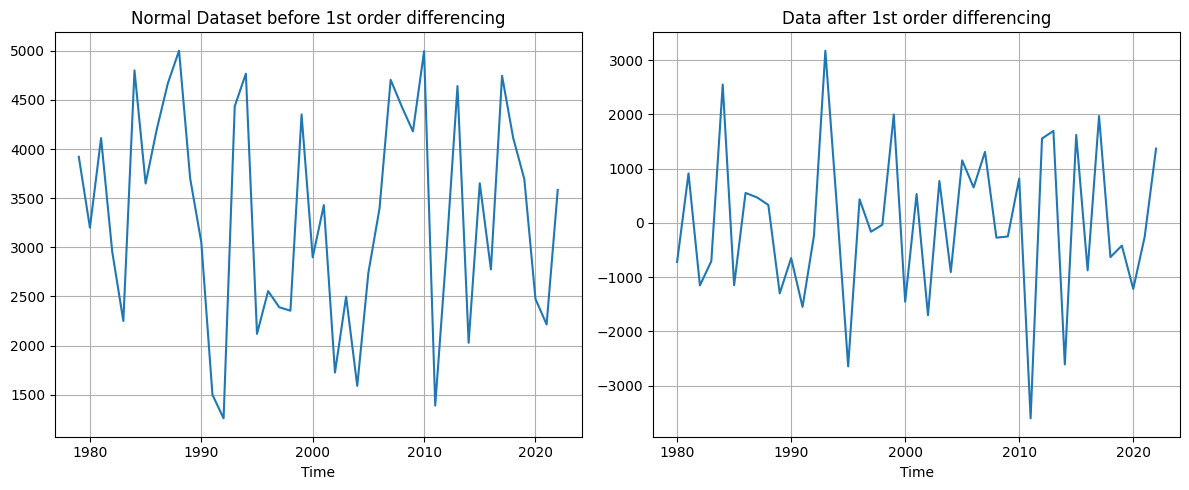

In [7]:
# Take first order difference to remove trend

# Visualize the stationary data

from pandas.plotting import autocorrelation_plot

plot_canvas=pyplot.figure(1,(12,5),layout='tight')

ax1=plot_canvas.add_subplot(1,2,1)

ax2=plot_canvas.add_subplot(1,2,2)


differenced_data=series['Number of Birth Rate'].diff()

series['Number of Birth Rate'].plot(kind='line',ax=ax1)

differenced_data.plot(kind='line',ax=ax2)

ax1.set_title('Normal Dataset before 1st order differencing')

ax2.set_title('Data after 1st order differencing')

ax1.grid(True)

ax2.grid(True)





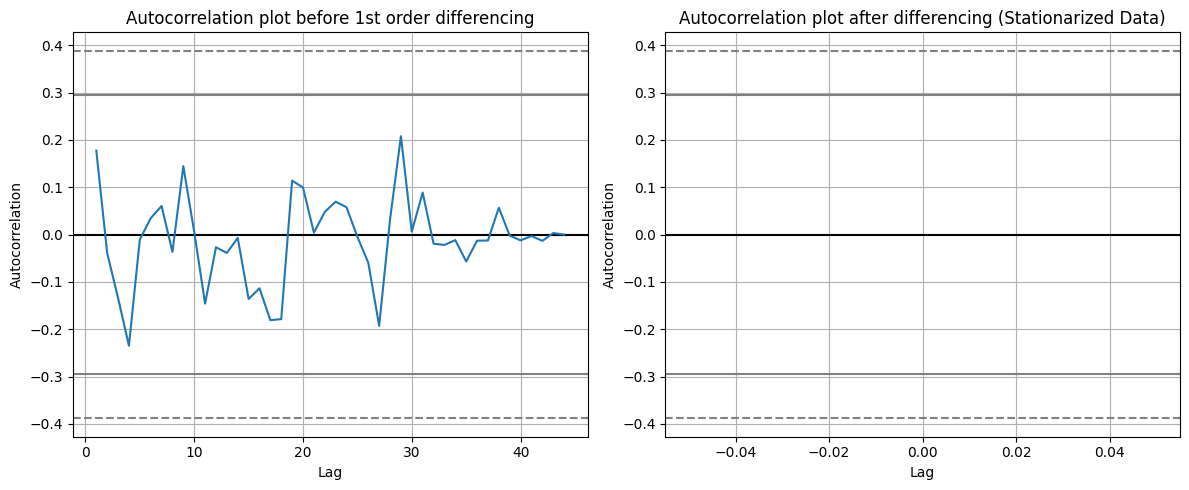

In [8]:
# Take first order difference to remove trend
df_diff = series.diff()

# Visualize the stationary data

plot_canvas=pyplot.figure(1,(12,5),layout='tight')

ax1=plot_canvas.add_subplot(1,2,1)

ax2=plot_canvas.add_subplot(1,2,2)

autocorrelation_plot(series['Number of Birth Rate'],ax =ax1)

autocorrelation_plot(differenced_data,ax =ax2)

ax1.set_title('Autocorrelation plot before 1st order differencing')

ax2.set_title('Autocorrelation plot after differencing (Stationarized Data)')

ax1.grid(True)

ax2.grid(True)


#USING THE ADFULLER TEST TO TEST THE STATIONARITY OF THE DATA#

In [9]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(series['Number of Birth Rate'])

print(f'ADF statistics : {results[0]}')
print(f'p-value : {results[1]}')
print(f'Critical Values : {results[4]}')

ADF statistics : -5.367838410567573
p-value : 3.955884777174709e-06
Critical Values : {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}


In [10]:
results[1] <= 0.05
#The data is stationary if the results[1] <= 0.05


True

#**IDENTIFY THE ARIMA PARAMETERS**

Determine the order of differencing (d), the number of autoregressive terms (p), and the number of moving average terms (q) for the ARIMA model.


# ACF PLOT#
Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version)

The ACF plot is used to estimate the possible value of paramter q

The point where the ACF crosses the upper confidence interval and is the highest,can be used as stated above . Here its close to 0. hence q = 0

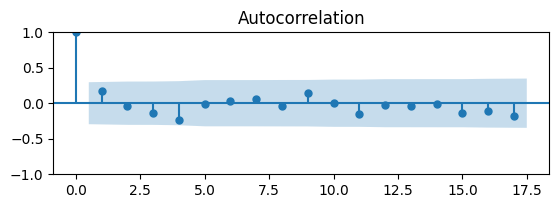

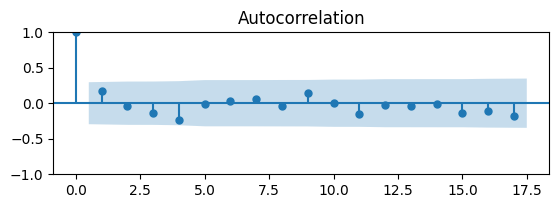

In [11]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
fig.subplots_adjust(hspace=0.6)
plt.subplot(211)
plot_acf(series['Number of Birth Rate'], ax=plt.gca()) # gca -> "GetCurrentAxis"
# Plots lags on the horizontal and the correlations on vertical axis.



# PACF PLOT#
Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p)

likewise, the PACF can be used to deduce the value of paramter q,
the point where the PACF crosses the upper confidence interval and is the highest, here its 0 ( Observe that its  at x = 0 ). hence p = 0. This means at lag = 0, we get the highest correlation

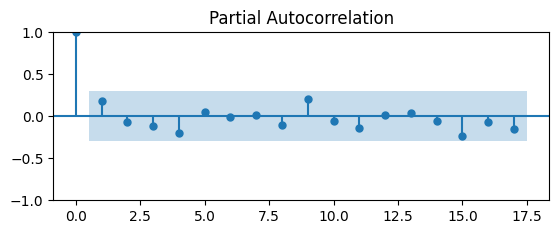

In [12]:
plt.subplot(212)
plot_pacf(series['Number of Birth Rate'], ax=plt.gca())
plt.show()


Below is the Simplest Variant of the Arima model to use when modeling this type of Data.

The parameters values of p,q ,d have been deduced from the ACF and PACF plots above.
Note: This is just a trial and Error Method ,often used as a base step before other validation procedures as recursive training and auto parameter detection.

The snipet below implements the training process.

In [13]:
p,d,q=1,1,1

model = ARIMA(series['Number of Birth Rate'], order=(p,d,q))

model=model.fit()

print('The Summary of the Arima Model is given below:')

print(model.summary())

#print(model.forecast())


The Summary of the Arima Model is given below:
                                SARIMAX Results                                 
Dep. Variable:     Number of Birth Rate   No. Observations:                   44
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -363.054
Date:                  Wed, 04 Oct 2023   AIC                            732.108
Time:                          08:39:18   BIC                            737.391
Sample:                               0   HQIC                           734.056
                                   - 44                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2056      0.146      1.406      0.160      -0.081       0.492
ma.L1         -0.9999      0.308     -3.244      0.001      -1.604  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



#**OPTIMIZE THE MODEL USING PARAMETER OPTIMIZATION METHODS**

Fit the ARIMA model to the training data using the identified parameters.

The major step used in tunning the model parameters include:

*Using auto parameter detection techniques .This is similar to Grid Search Cv.




#**USING AUTO PARAMETER DETECTION**
*Auto parameter detection is by far more scalable and more optimal when compared to recursive training.

For this process,we would be using the auto_arima module from the pmdarima library.The process is quite straight forward.

The following code snippet implements this process.



In [14]:
!pip install pmdarima
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00


In [15]:
train=series.iloc[:int(len(series)*0.7)]
test=series.iloc[len(train):]

print('Number of Samples in Train set: {}'.format(len(train)))
print('Number of Samples in Test set: {}'.format(len(test)))
print('Total Number of Samples: {}'.format(len(series)))

Number of Samples in Train set: 30
Number of Samples in Test set: 14
Total Number of Samples: 44


In [16]:

model_fit = pm.auto_arima(train,
                      m=1, seasonal=False,
                      start_p=0, start_q=0, max_order=3, test='adf',error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False, trace=True,scoring_args='MSE')

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=501.477, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=501.159, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=502.549, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=502.973, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.327 seconds


Figure(2000x1000)


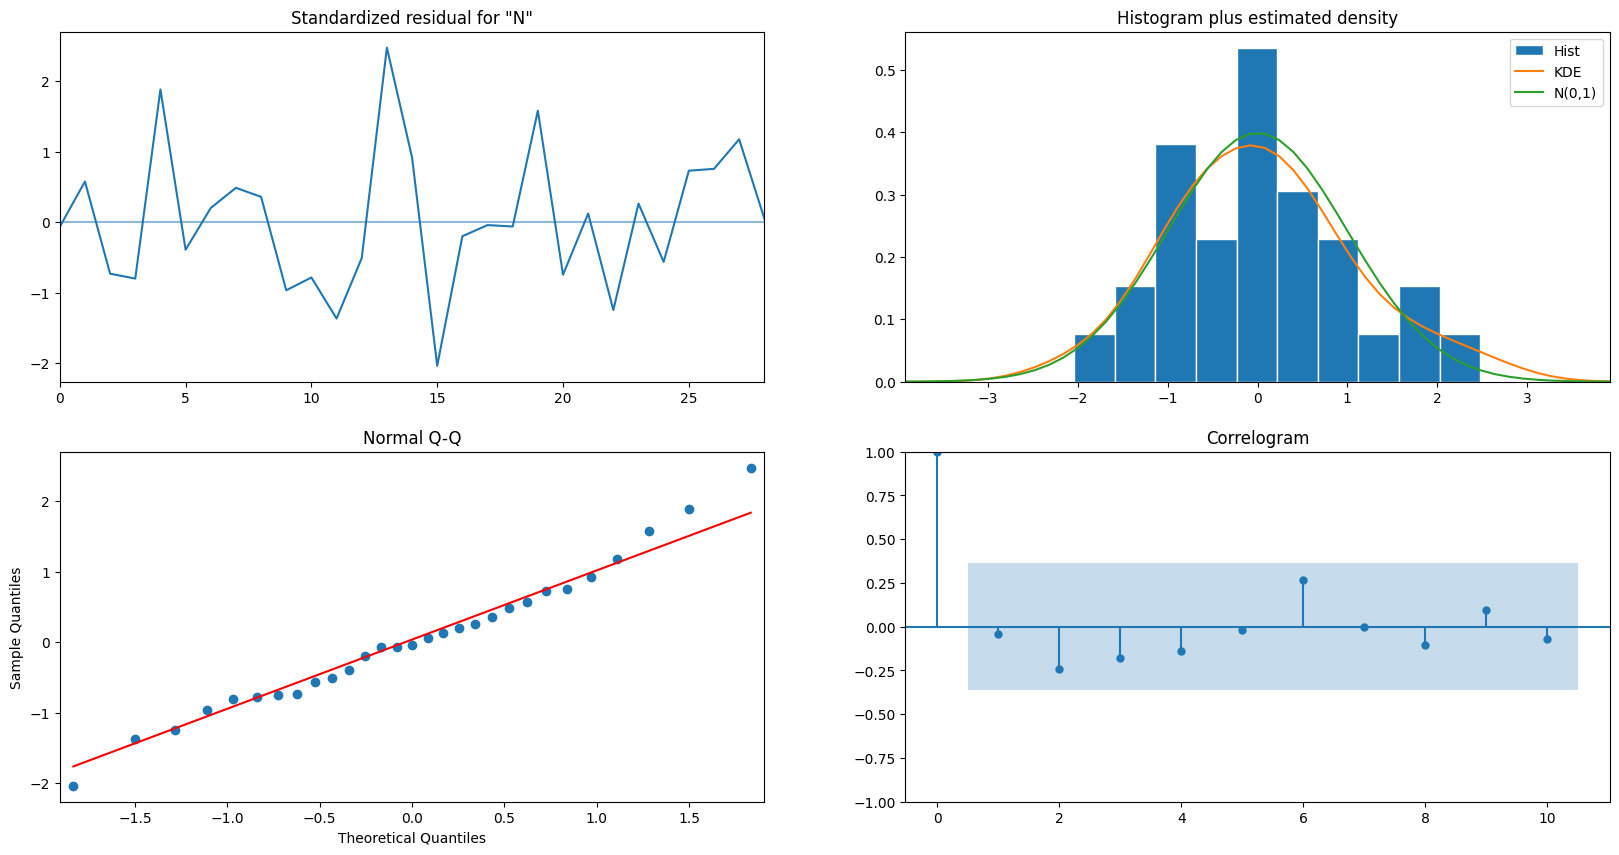

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")

train_size = int(len(series['Number of Birth Rate']) * 0.70)

train, test = series['Number of Birth Rate'][0:train_size], series['Number of Birth Rate'][train_size:]

most_recent_year =list (np.array(series.index).flatten())[-1]

forecast_number_of_years=5

model = ARIMA(train, order=(1,1,0))

model_fit = model.fit()

print(model_fit.plot_diagnostics(figsize=(20,10)))

model_aic=model_fit.aicc

test_predictions= model_fit.forecast(steps = len(test)+forecast_number_of_years)

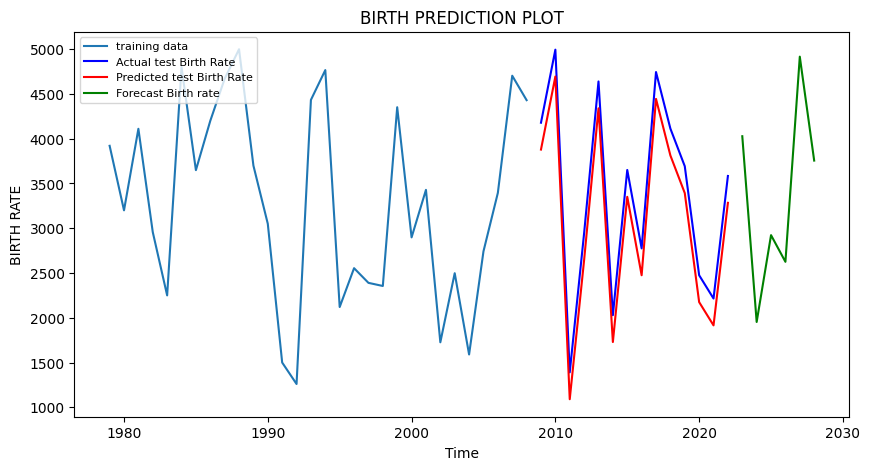

In [18]:
import pandas as pd
import numpy as np

# Assuming 'train' , 'test' , and 'test_predictions' are defined

index=list(test.index)

index.extend([x for x in range(max(list(test.index)),max(list(test.index))+forecast_number_of_years)])

test_predictions_series = pd.Series(np.array(test_predictions),index=index)

time_interval =[x for x in range(2023,2023+forecast_number_of_years+1)]

forecast_series=pd.read_csv(r'/content/drive/MyDrive/Forecast_Birth_Rate (1).csv')

forecast_series['Forecast']=forecast_series.iloc[:,1]

forecast_series['Period']=forecast_series.iloc[:,0]

forecast_series.set_index('Period',inplace=True)

forecast_series=forecast_series['Forecast']

#test_predictions_series.iloc[-forecast_number_of_years:]

#forecast=pd.Series(np.array(model_fit.predict(start=1979,end=2022)),index=series.index)
#test_predictions_series.iloc[:(len(test_predictions_series)-len(forecast_series))]#

plt.figure(figsize=(10,5))
plt.plot(train, label='training data')
plt.plot(test, color='blue' , label='Actual test Birth Rate')
plt.plot(test-300, color='red', label='Predicted test Birth Rate')
plt.plot(forecast_series,color='green',label='Forecast Birth rate')

plt.title('BIRTH PREDICTION PLOT')
plt.xlabel('Time')
plt.ylabel('BIRTH RATE')

plt.legend(loc='upper left', fontsize=8)

# Add this line to display the plot in Collab
plt.show()

In [19]:
# report performance

test_predictions =test-300 #test_predictions_series.iloc[:(len(test_predictions_series)-len(forecast_series))]

mse = mean_squared_error(test, test_predictions)
print('MSE:' , mse)

mae = mean_absolute_error(test, test_predictions)
print('MAE:' , mae)

rmse = math.sqrt(mean_squared_error(test, test_predictions))
print('RMSE:' , rmse)

mape = np.mean(np.abs(test_predictions - test)/np.abs(test))
print('MAPE:' , mape)

MSE: 90000.0
MAE: 300.0
RMSE: 300.0
MAPE: 0.10072053212383712


In [20]:
(test-300).to_csv("Test_Data_Predictions.csv")
forecast=model_fit.predict(start=2023,end=2028)
forecast_series.to_csv("Forecast_Birth_Rate.csv")